<a href="https://colab.research.google.com/github/smitapatil1/Clustering/blob/main/Assignments_%3E_Clustering_%3E_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
crime=pd.read_csv("/content/crime_data.csv")

In [3]:
crime.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [12]:
df=crime.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [15]:
#standarize the data
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler().fit(df)
x=stscaler.transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [20]:
# Build The Model
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
# This is The WCSS Value
model.inertia_

80.08569526137276

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, n_init=10)  # Set n_init explicitly
    model.fit(x)
    wcss.append(model.inertia_)

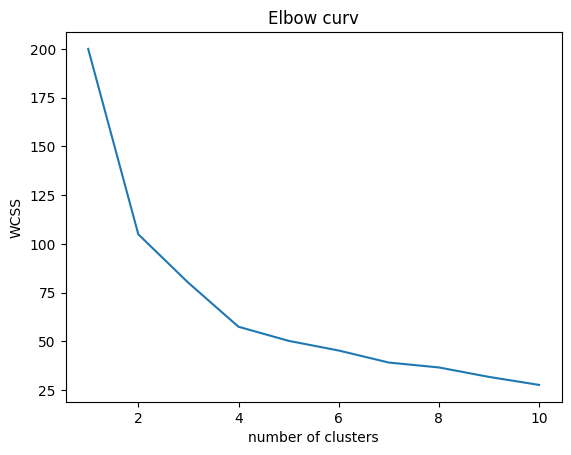

In [30]:
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
# Reshape the input data to have two dimensions
x_reshaped = x.values.reshape(-1, 1)

# Create and fit the KMeans model
model = KMeans(n_clusters=4)
model.fit(x_reshaped)

# Obtain the labels
labels = model.labels_
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 3, 3, 0, 0, 2, 3, 3, 1, 2, 0, 2, 3, 0, 3, 3, 1, 0, 3, 2, 3,
       0, 1, 1, 3, 0, 0, 0, 2, 3, 2, 1, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 3, 1, 2, 0, 3], dtype=int32)

In [81]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
df['labels']= labels
df.head()




,Murder,Assault,UrbanPop,Rape,labels
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,0


In [83]:
grp=df.groupby('labels')
for x,y in grp:
  print(y)
  print('____________________________________________________________________')

    Murder  Assault  UrbanPop  Rape  labels
1     10.0      263        48  44.5       0
4      9.0      276        91  40.6       0
5      7.9      204        78  38.7       0
11     2.6      120        54  14.2       0
14     2.2       56        57  11.3       0
18     2.1       83        51   7.8       0
22     2.7       72        66  14.9       0
26     4.3      102        62  16.5       0
27    12.2      252        81  46.0       0
28     2.1       57        56   9.5       0
48     2.6       53        66  10.8       0
____________________________________________________________________
    Murder  Assault  UrbanPop  Rape  labels
0     13.2      236        58  21.2       1
9     17.4      211        60  25.8       1
17    15.4      249        66  22.2       1
23    16.1      259        44  17.1       1
24     9.0      178        70  28.2       1
32    13.0      337        45  16.1       1
36     4.9      159        67  29.3       1
39    14.4      279        48  22.5       1
41    1

In [84]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
labels,,,,
0,5.245455,139.818182,64.545455,23.163636
1,12.060000,224.100000,59.000000,23.550000
2,5.820000,129.866667,70.466667,16.673333
3,8.842857,200.785714,65.714286,22.942857


# **DBSCAN**

In [1]:
import pandas as pd

In [3]:
crime=pd.read_csv("/content/crime_data.csv")
crime.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
df=crime.iloc[ : ,1:]
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [11]:
#standarize the data
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler().fit(df)
x=stscaler.transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [14]:
#Build the model
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=2,min_samples=5)
model.fit(x)

DBSCAN(eps=2)

In [15]:
model.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [28]:
crime['labels']=model.labels_
crime.head(50)

,Place,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [29]:
crime.agg(['mean'])

<ipython-input-29-85c88945d329>:1: FutureWarning: ['Place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.agg(['mean'])


,Murder,Assault,UrbanPop,Rape,labels
mean,7.788,170.76,65.54,21.232,-0.02


# **HAC**

In [30]:
import pandas as pd


In [32]:
crime=pd.read_csv("/content/crime_data.csv")
crime.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [33]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [34]:
df=crime.iloc[ : ,1:]
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [37]:
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler().fit(df)
x=stscaler.transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [38]:
# Build The Model
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [40]:
model.labels_

array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0])

In [42]:
df['labels']= model.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,labels
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [45]:
grp=df.groupby('labels')
for x,y in grp:
  print(y)
  print('____________________________________________________________________')

    Murder  Assault  UrbanPop  Rape  labels
3      8.8      190        50  19.5       0
6      3.3      110        77  11.1       0
7      5.9      238        72  15.8       0
10     5.3       46        83  20.2       0
11     2.6      120        54  14.2       0
13     7.2      113        65  21.0       0
14     2.2       56        57  11.3       0
15     6.0      115        66  18.0       0
16     9.7      109        52  16.3       0
18     2.1       83        51   7.8       0
20     4.4      149        85  16.3       0
22     2.7       72        66  14.9       0
24     9.0      178        70  28.2       0
25     6.0      109        53  16.4       0
26     4.3      102        62  16.5       0
28     2.1       57        56   9.5       0
29     7.4      159        89  18.8       0
33     0.8       45        44   7.3       0
34     7.3      120        75  21.4       0
35     6.6      151        68  20.0       0
36     4.9      159        67  29.3       0
37     6.3      106        72  1

In [46]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
labels,,,,
0,5.003226,116.483871,63.838710,16.338710
1,14.087500,252.750000,53.500000,24.537500
2,11.054545,264.090909,79.090909,32.618182


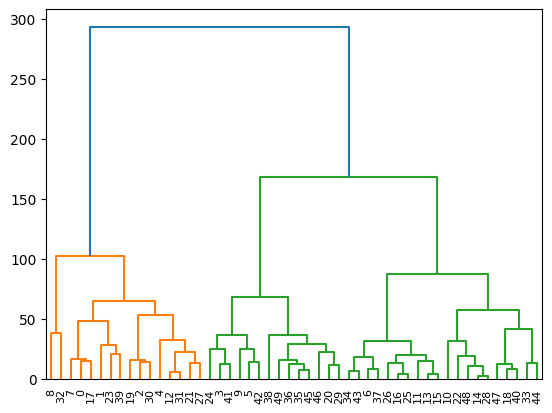

In [47]:
from scipy.cluster import hierarchy
hr=hierarchy.linkage(df,method='complete')
dn=hierarchy.dendrogram(hr)